In [5]:
import os
print(os.getcwd())

C:\Users\Ayush


In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [140]:
titanic_data= pd.read_csv("Titanic.csv")
titanic_data.head(10)
titanic_data.columns  = ["S.no","Class","Sex","Age","Survived","Freq"]
titanic_data.columns
titanic_data.head(10)
titanic_data["Survived_flag"] = (titanic_data["Survived"]=="No").apply(lambda x: int(x))
titanic_data.head(10)

,S.no,Class,Sex,Age,Survived,Freq,Survived_flag
0,1,1st,Male,Child,No,0,1
1,2,2nd,Male,Child,No,0,1
2,3,3rd,Male,Child,No,35,1
3,4,Crew,Male,Child,No,0,1
4,5,1st,Female,Child,No,0,1
5,6,2nd,Female,Child,No,0,1
6,7,3rd,Female,Child,No,17,1
7,8,Crew,Female,Child,No,0,1
8,9,1st,Male,Adult,No,118,1
9,10,2nd,Male,Adult,No,154,1


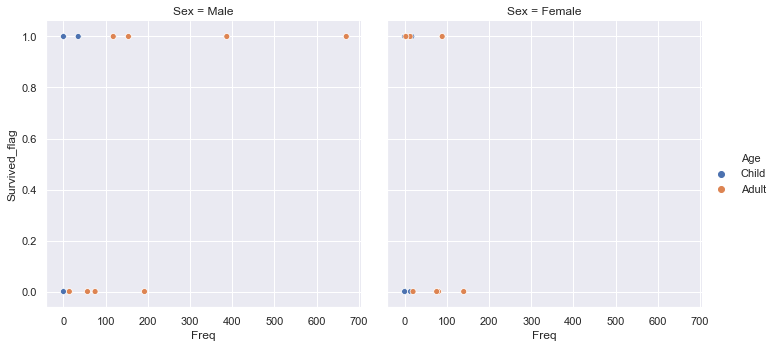

In [141]:
sns.set()
sns.relplot(x="Freq",y="Survived_flag", col="Sex",
            hue="Age",
            data=titanic_data);
# pop_data_titanic = sns.load_dataset("titanic_data")

In [249]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("train.csv")
# gender_submission_data  =pd.read_csv("gender_submission.csv")
train_data.head(10)
# overall_data = train_data.append(test_data, ignore_index=True)
overall_data = train_data
print(overall_data.shape[0])
print(train_data.shape[0])
print(test_data.shape[0])

891
891
891


In [250]:
overall_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


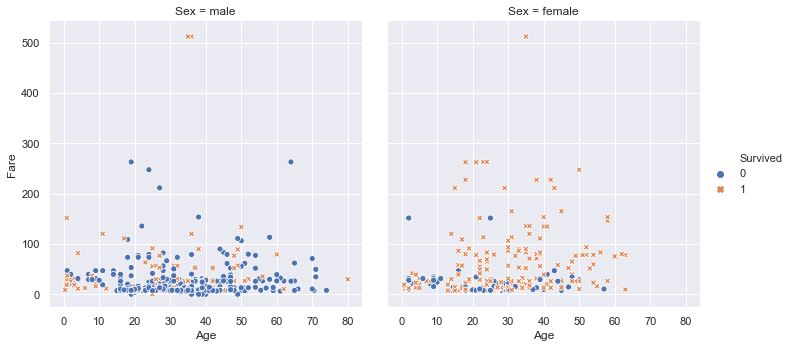

In [251]:
# sns.set()
# sns.relplot(x="Fare",y="Age", col="Sex",
#             hue="Survived",style = "Survived", size = "Pclass",legend="full",
#             data=overall_data);
sns.relplot(x="Age",y="Fare", col="Sex",
            hue="Survived",style = "Survived",legend="full",
            data=overall_data);

# Sex appears to be an important factor apart from fare among ladies

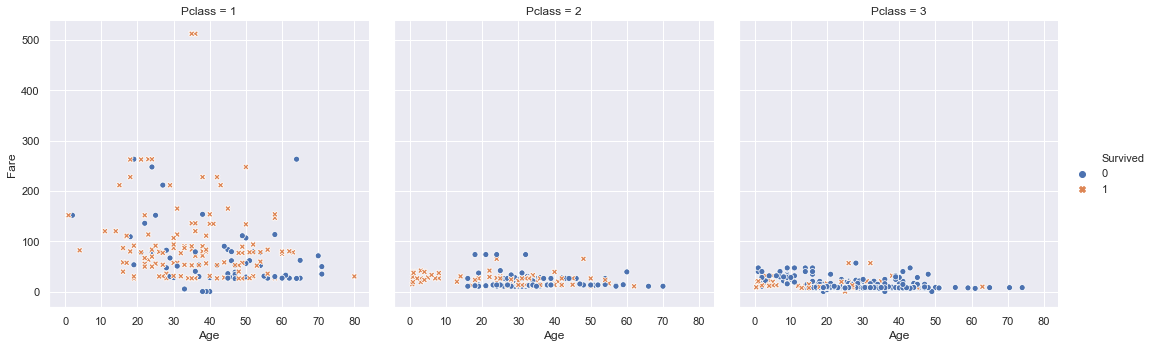

In [252]:
sns.relplot(x="Age",y="Fare", col="Pclass",
            hue="Survived",style = "Survived",legend="full",
            data=overall_data);

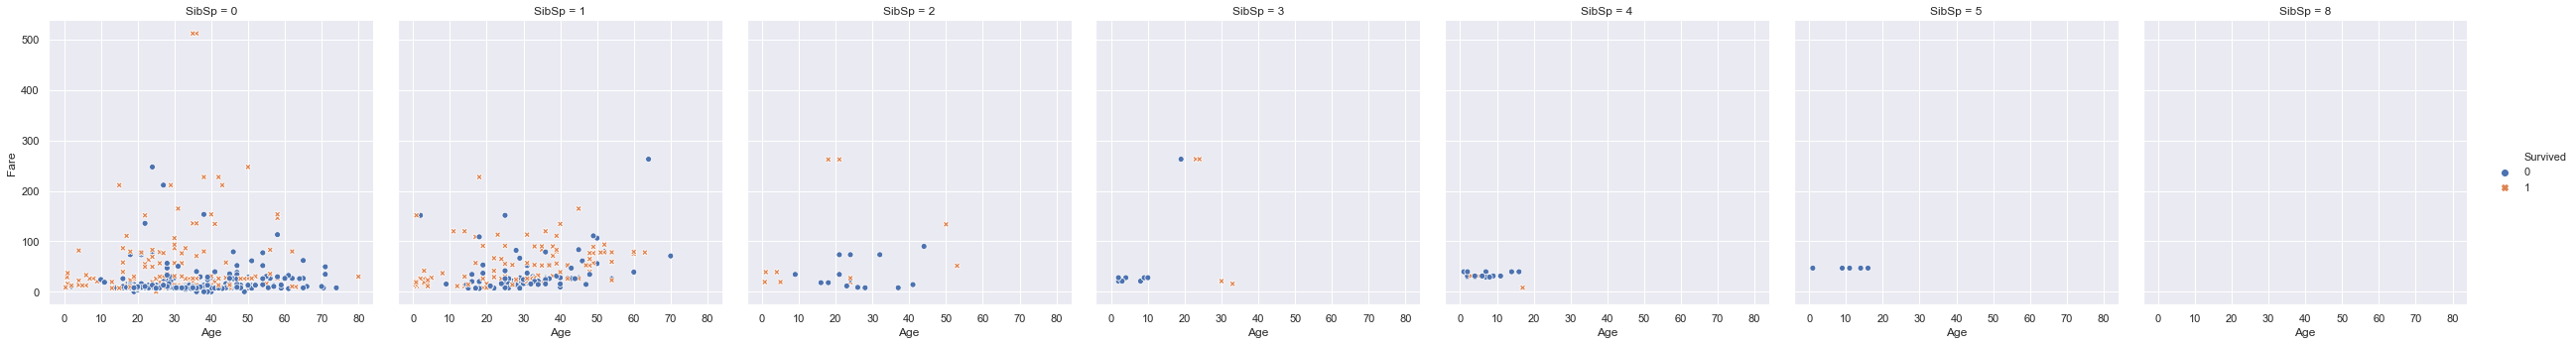

In [253]:
sns.relplot(y="Fare",x="Age", col="SibSp",
            hue="Survived",style = "Survived",legend="full",
            data=overall_data);

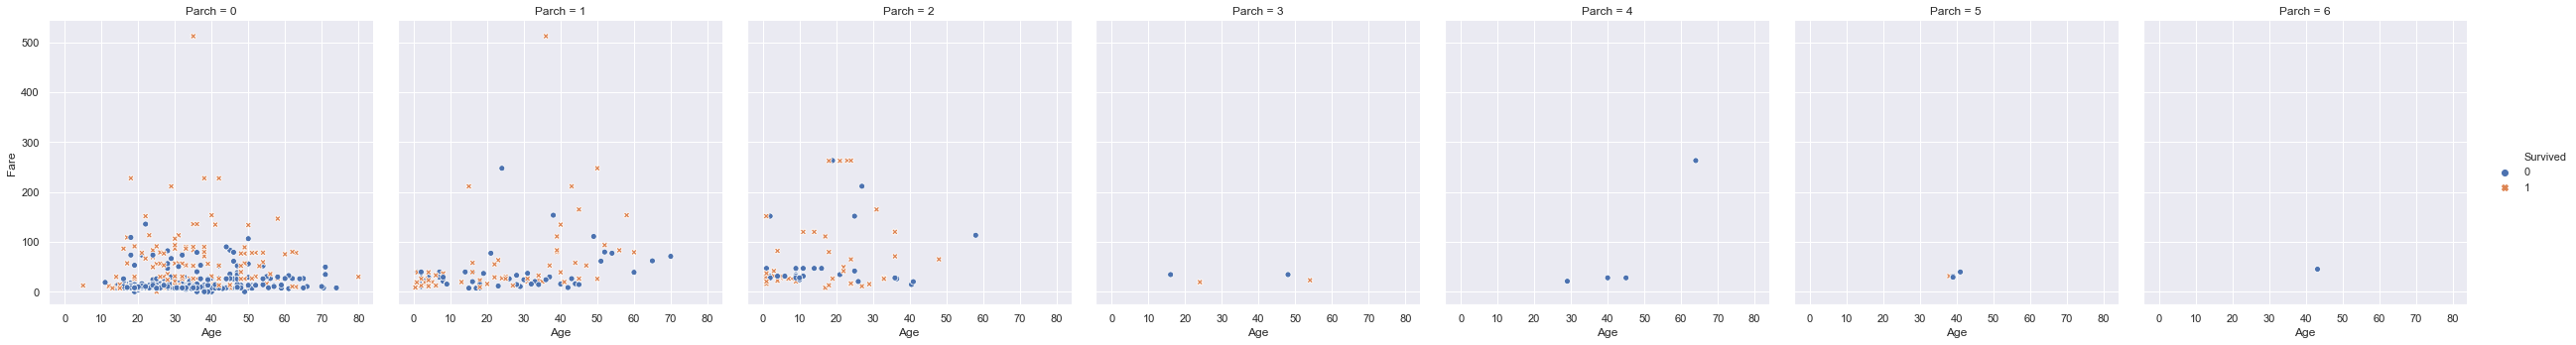

In [254]:
sns.relplot(y="Fare",x="Age", col="Parch",
            hue="Survived",style = "Survived",legend="full",
            data=overall_data);

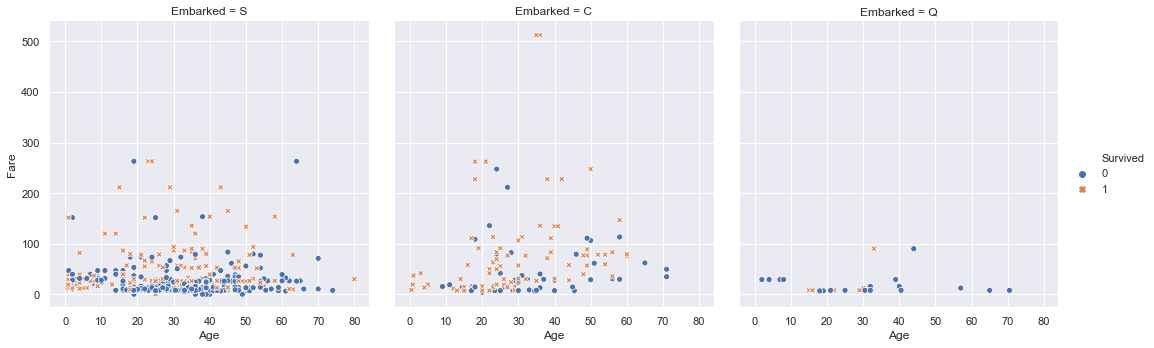

In [255]:
sns.relplot(y="Fare",x="Age", col="Embarked",
            hue="Survived",style = "Survived",legend="full",
            data=overall_data);

In [256]:
overall_data["Cabin"] = overall_data["Cabin"].fillna("U00")
overall_data["Cabin"].unique()

array(['U00', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [257]:
overall_data["Cabin"].unique()
def cabin_feature_creation(x):
    if x.find(" ") != -1 and x[1] != " ":
        return "Mutiple rooms"
    elif x=="U00":
        return "Untagged rooms"
    elif x.find(" ") != -1:
        return x[0]+"-"+x[2]+" special_rooms"
    elif len(x) > 1:
        return x[0]+"-"+str(int(int(x[1:])/10)) + "Range"
    elif len(x) ==1:
        return x + "- special"


In [258]:
overall_data["Cabin_type"] = overall_data["Cabin"].apply(lambda x: cabin_feature_creation(x))
overall_data.head()
overall_data["Cabin_type"].unique()

array(['Untagged rooms', 'C-8Range', 'C-12Range', 'E-4Range', 'G-0Range',
       'C-10Range', 'D-5Range', 'A-0Range', 'Mutiple rooms', 'B-7Range',
       'D-3Range', 'B-3Range', 'C-5Range', 'B-2Range', 'F-3Range',
       'F-G special_rooms', 'E-3Range', 'D-2Range', 'C-11Range',
       'E-10Range', 'F-E special_rooms', 'D-4Range', 'B-8Range',
       'F-0Range', 'C-0Range', 'B-1Range', 'C-4Range', 'A-3Range',
       'B-0Range', 'D-1Range', 'C-9Range', 'C-7Range', 'E-6Range',
       'B-9Range', 'D-0Range', 'A-1Range', 'B-4Range', 'D- special',
       'C-6Range', 'C-3Range', 'T- special', 'E-5Range', 'E-1Range',
       'E-2Range', 'A-2Range', 'B-5Range', 'E-0Range', 'B-10Range',
       'E-12Range', 'E-7Range', 'B-6Range', 'C-14Range'], dtype=object)

In [259]:
# sns_plot=sns.relplot(y="Fare",x="Age", col="Cabin_type",
#             hue="Survived",style = "Survived",legend="full",
#             data=overall_data);
def categorical_event_rate(col,predict_field, df):
    for i in df[col].unique():
        print(""" EVENT RATE for """, col,
              """ in """, i , """ : """,
              round(sum(df[df[col] == i][predict_field])*100/len(df[df[col] == i]),2),
                   """ and the total obs in catg are: """, len(df[df[col] == i]))

In [260]:
categorical_event_rate("Cabin_type", "Survived", overall_data)

 EVENT RATE for  Cabin_type  in  Untagged rooms  :  29.99  and the total obs in catg are:  687
 EVENT RATE for  Cabin_type  in  C-8Range  :  33.33  and the total obs in catg are:  6
 EVENT RATE for  Cabin_type  in  C-12Range  :  55.56  and the total obs in catg are:  9
 EVENT RATE for  Cabin_type  in  E-4Range  :  60.0  and the total obs in catg are:  5
 EVENT RATE for  Cabin_type  in  G-0Range  :  50.0  and the total obs in catg are:  4
 EVENT RATE for  Cabin_type  in  C-10Range  :  100.0  and the total obs in catg are:  4
 EVENT RATE for  Cabin_type  in  D-5Range  :  50.0  and the total obs in catg are:  2
 EVENT RATE for  Cabin_type  in  A-0Range  :  33.33  and the total obs in catg are:  3
 EVENT RATE for  Cabin_type  in  Mutiple rooms  :  65.0  and the total obs in catg are:  20
 EVENT RATE for  Cabin_type  in  B-7Range  :  83.33  and the total obs in catg are:  6
 EVENT RATE for  Cabin_type  in  D-3Range  :  87.5  and the total obs in catg are:  8
 EVENT RATE for  Cabin_type  in 

In [261]:
overall_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U00,S,Untagged rooms
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C-8Range
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U00,S,Untagged rooms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C-12Range
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U00,S,Untagged rooms


In [262]:
# overall_data["Ticket_class"] = overall_data[["Ticket","Pclass"]].apply(lambda x: x[0].astype(str)%(x[1]))
overall_data["Ticket_class"] = overall_data["Ticket"] + "_" + overall_data["Pclass"].astype(str)
overall_data.head(10)
# overall_data["Ticket_class"].nunique()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Ticket_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U00,S,Untagged rooms,A/5 21171_3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C-8Range,PC 17599_1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U00,S,Untagged rooms,STON/O2. 3101282_3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C-12Range,113803_1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U00,S,Untagged rooms,373450_3
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U00,Q,Untagged rooms,330877_3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E-4Range,17463_1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U00,S,Untagged rooms,349909_3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U00,S,Untagged rooms,347742_3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U00,C,Untagged rooms,237736_2


In [263]:
### Listing important variables Fare, Sex, Age, Embarked, Pclass, Parch
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV


In [264]:
print("Total percentage of people died :", round(100- (sum(overall_data["Survived"])*100/len(overall_data["Survived"])),2), "%")

Total percentage of people died : 61.62 %


In [265]:
def func_perc(base_field,df,predict_field):
    print ("Total percentage of ", base_field, " who qualify as ", predict_field, " is : " , round(df[df[predict_field] == 1][base_field].nunique()*100/df[base_field].nunique(),2), "%")

In [266]:
func_perc("PassengerId", overall_data, "Survived")

Total percentage of  PassengerId  who qualify as  Survived  is :  38.38 %


In [267]:
overall_data.nunique()

PassengerId     891
Survived          2
Pclass            3
Name            891
Sex               2
Age              88
SibSp             7
Parch             7
Ticket          681
Fare            248
Cabin           148
Embarked          3
Cabin_type       52
Ticket_class    681
dtype: int64

In [268]:
#### CHECKING FOR MISSING VALUES ###
for i in overall_data.columns:
    print("Missing perc for ", i, "is: ",round(sum(overall_data[i].isnull())*100/len(overall_data[i]),2), "Total records: ", len(overall_data[i]))

Missing perc for  PassengerId is:  0.0 Total records:  891
Missing perc for  Survived is:  0.0 Total records:  891
Missing perc for  Pclass is:  0.0 Total records:  891
Missing perc for  Name is:  0.0 Total records:  891
Missing perc for  Sex is:  0.0 Total records:  891
Missing perc for  Age is:  19.87 Total records:  891
Missing perc for  SibSp is:  0.0 Total records:  891
Missing perc for  Parch is:  0.0 Total records:  891
Missing perc for  Ticket is:  0.0 Total records:  891
Missing perc for  Fare is:  0.0 Total records:  891
Missing perc for  Cabin is:  0.0 Total records:  891
Missing perc for  Embarked is:  0.22 Total records:  891
Missing perc for  Cabin_type is:  0.0 Total records:  891
Missing perc for  Ticket_class is:  0.0 Total records:  891


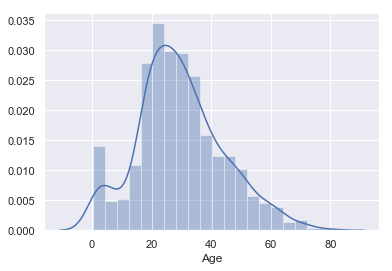

In [269]:
# ## EDA for missing value treatment
import math
# sns.distplot(overall_data[not(overall_data["Age"].isnull())]["Age"])
sns.distplot(overall_data[overall_data["Age"].isnull()== False]["Age"])

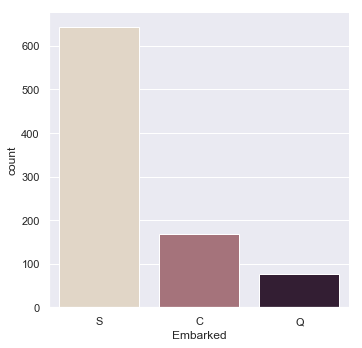

In [270]:
# sns.catplot(overall_data[overall_data["Embarked"].isnull()== False]["Embarked"])
# sns.catplot(x="Embarked", y="Sex",hue="Survived", kind="bar", data=overall_data[overall_data["Embarked"].isnull()== False])
sns.catplot(x="Embarked", kind="count", palette="ch:.25", data=overall_data[overall_data["Embarked"].isnull()== False])
# It can be seen that almost for every 9 observations , 6 embarked from 2 from C and 1 from Q 

In [275]:
#Filling missing values for embarked column
overall_data[overall_data["Embarked"].isnull()== True]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Ticket_class
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B-2Range,113572_1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B-2Range,113572_1


In [297]:
overall_data.groupby(["Embarked","Pclass","Cabin_type"]).count()
# For sure the missing embarkments should belong to C it seems as the Cabin type and Pclass suggest it belongs to C
#Subsituting missing values
overall_data["Embarked"] = overall_data["Embarked"].fillna("C")
overall_data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [298]:
#2 missing values were treated for embarkment
#22% substitution left for age
overall_data[overall_data["Age"].isnull()== False]["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [301]:
overall_data.groupby(["Embarked","Pclass","Cabin_type"])["Age"].describe()

count       mean        std    min     25%  \
Embarked Pclass Cabin_type                                                      
C        1      A-0Range             2.0  63.500000  10.606602  56.00  59.750   
                A-1Range             2.0  42.000000   8.485281  36.00  39.000   
                A-2Range             2.0  52.500000   4.949747  49.00  50.750   
                A-3Range             1.0  40.000000        NaN  40.00  40.000   
                B-0Range             1.0  44.000000        NaN  44.00  44.000   
                B-10Range            1.0  35.000000        NaN  35.00  35.000   
                B-1Range             2.0  30.000000  19.798990  16.00  23.000   
                B-2Range             2.0  50.000000  16.970563  38.00  44.000   
                B-3Range             5.0  38.600000  21.066561  22.00  24.000   
                B-4Range             3.0  34.666667  22.143472  19.00  22.000   
                B-5Range             1.0  32.000000        NaN  32.00  32.000   
                B-7Range             0.0        NaN        NaN    NaN     NaN   
                B-8Range             2.0  41.000000  24.041631  24.00  32.500   
                C-11Range            2.0  33.500000   4.949747  30.00  31.750   
                C-14Range            1.0  26.000000        NaN  26.00  26.000   
                C-3Range             1.0  36.000000        NaN  36.00  36.000   
                C-4Range             2.0  44.000000   8.485281  38.00  41.000   
                C-5Range             2.0  40.000000  22.627417  24.00  32.000   
                C-6Range             4.0  30.750000  15.840349  17.00  17.750   
                C-7Range             1.0  17.000000        NaN  17.00  17.000   
                C-8Range             3.0  38.333333  11.503623  27.00  32.500   
                C-9Range             2.0  36.500000  17.677670  24.00  30.250   
                D-1Range             1.0  32.000000        NaN  32.00  32.000   
                D-2Range             2.0  53.000000   1.414214  52.00  52.500   
                D-3Range             5.0  42.200000  14.923136  23.00  31.000   
                D-4Range             2.0  42.500000  21.920310  27.00  34.750   
                E-3Range             2.0  35.000000   7.071068  30.00  32.500   
                E-4Range             2.0  40.000000   1.414214  39.00  39.500   
                E-5Range             1.0  25.000000        NaN  25.00  25.000   
                Mutiple rooms        8.0  29.500000  12.783918  18.00  20.250   
...                                  ...        ...        ...    ...     ...   
S        1      C-8Range             3.0  47.333333  13.650397  35.00  40.000   
                C-9Range             4.0  36.500000   1.732051  35.00  35.000   
                D-0Range             3.0  37.666667  22.300972  21.00  25.000   
                D-1Range             4.0  47.500000   3.872983  42.00  46.500   
                D-2Range             3.0  30.333333  20.647841  16.00  18.500   
                D-3Range             3.0  34.333333  14.189198  19.00  28.000   
                D-4Range             2.0  33.000000  19.798990  19.00  26.000   
                D-5Range             1.0  61.000000        NaN  61.00  61.000   
                E-0Range             2.0  30.000000   4.242641  27.00  28.500   
                E-1Range             2.0  49.500000   2.121320  48.00  48.750   
                E-2Range             4.0  37.250000   3.201562  35.00  35.750   
                E-3Range             3.0  44.333333  21.548395  22.00  34.000   
                E-4Range             3.0  47.666667   7.767453  39.00  44.500   
                E-5Range             1.0  47.000000        NaN  47.00  47.000   
                E-6Range             4.0  39.000000  14.988885  18.00  33.750   
                Mutiple rooms       12.0  23.993333  17.272379   0.92  13.250   
                T- special           1.0  45.000000        NaN  45

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
stacked_bar_data = pd.read_csv("C:\Funnel_data_RE.csv")

stacked_bar_data["total"] = stacked_bar_data[""] + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [8]:
### CREATING MAP CHARTS FOR REAL ESTATE ###
import folium
# 28.73064804	77.54579163
# 28.28152084	76.9539032
latlong = pd.read_csv("lat_long_enquiries_feb12.csv")
l = list()
for i in len(latlong[""])

# latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
# mapit = folium.Map( location=[28.28152, 76.9539], zoom_start=6 )
# for coord in latlon:
#     folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

# mapit.save( 'map.html')